# Model for Nature Conservancy Fisheries Kaggle Competition

#### Dependencies

In [1]:
import fish_data as fd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import os

#### Helper functions

In [2]:
help(fd)

Help on module fish_data:

NAME
    fish_data

DESCRIPTION
    fish_data module contains the helper functions for the model build of the
    Nature Conservancy Fisheries Kaggle Competition.
    
    Dependencies:
        * numpy as np
        * os
        * scipy.ndimage as ndimage
        * scipy.misc as misc
        * scipy.special as special
        * matplotlib.pyplot as plt

FUNCTIONS
    count_nodes(std_y, std_x, pool_steps, final_depth)
        Calculates the number of flattened nodes after a number of 'VALID' pool
        steps of strides = [1,2,2,1]
    
    generate_balanced_epoch(min_each, shuffle=True)
        Function to generate a list of filenames to be used for each training epoch
        with a corresponding label array.  Most file names will be used  multiple  times
        in order that each fish is drawn into a training batch an equivalent number of
        times.
    
    generate_filenames_list()
        Iterates through the 'data/train' folders of the working dir

#### Generate the list of filenames for balanced training batch collections with corresponding label array

In [3]:
std_y = 500
std_x = 750
print("Aspect ratio: {}".format(std_x/std_y))

Aspect ratio: 1.5


In [4]:
valid_size = 150

In [5]:
valid_filenames = np.random.choice(fd.generate_filenames_list(), valid_size)

In [6]:
y_valid = fd.make_label(valid_filenames, 0, valid_size)
print("Valid size and num_labels are correct for the valid set: {}".format(y_valid.shape == (valid_size, 8)))
X_valid = fd.make_batch(valid_filenames, 0, valid_size, std_y, std_x, normalize = True, mutate = False)
print("Valid images have been resized and stacked: {}".format(X_valid.shape == (valid_size, std_y, std_x, 3)))

Valid size and num_labels are correct for the valid set: True
Valid images have been resized and stacked: True


data/train/ALB/img_05507.jpg
[1 0 0 0 0 0 0 0]


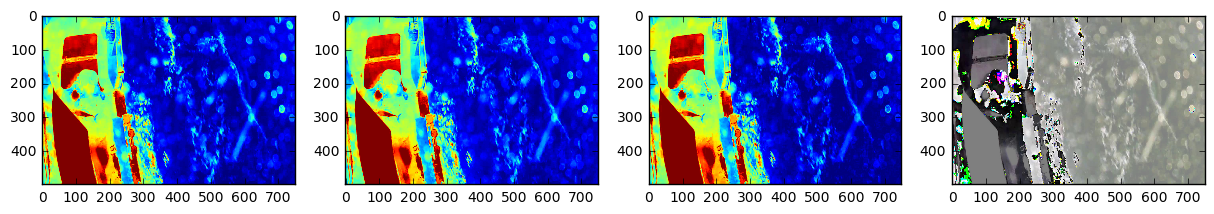

data/train/OTHER/img_03132.jpg
[0 0 0 0 0 1 0 0]


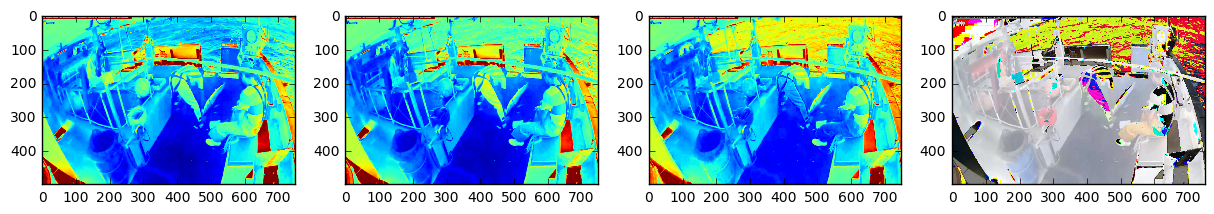

data/train/YFT/img_00298.jpg
[0 0 0 0 0 0 0 1]


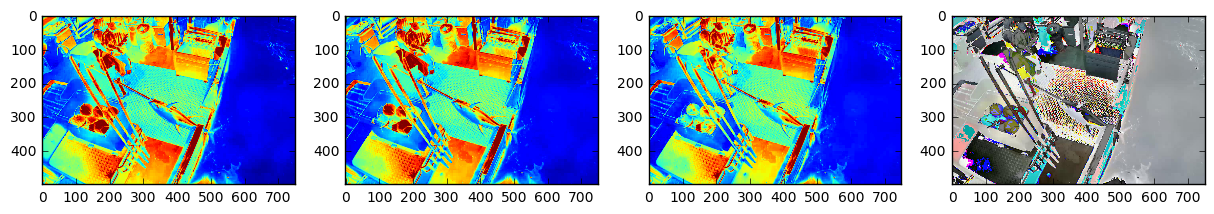

In [7]:
for i in range(3) :
    print(valid_filenames[i])
    print(y_valid[i, :])
    fd.show_panel(X_valid[i, :, :, :])

In [8]:
min_each = 1875
X_filenames = fd.generate_balanced_epoch(min_each, shuffle = True)


'ALB' set contains 1875 filenames from which to sample
'BET' set contains 1875 filenames from which to sample
'DOL' set contains 1875 filenames from which to sample
'LAG' set contains 1875 filenames from which to sample
'NoF' set contains 1875 filenames from which to sample
'OTHER' set contains 1875 filenames from which to sample
'SHARK' set contains 1875 filenames from which to sample
'YFT' set contains 1875 filenames from which to sample
15000 filenames are in the training set list
Filename list is shuffled: True


TEST batch generation at the end of an epoch
  Shape of batch array is correct: True
  Average pixel value is less than 0.1: True
  End of epoch navigated correctly: True

data/train/OTHER/img_07415.jpg
[0 0 0 0 0 1 0 0]


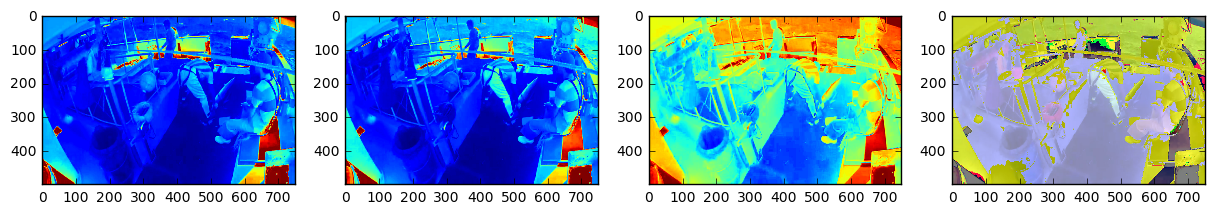

data/train/YFT/img_07613.jpg
[0 0 0 0 0 0 0 1]


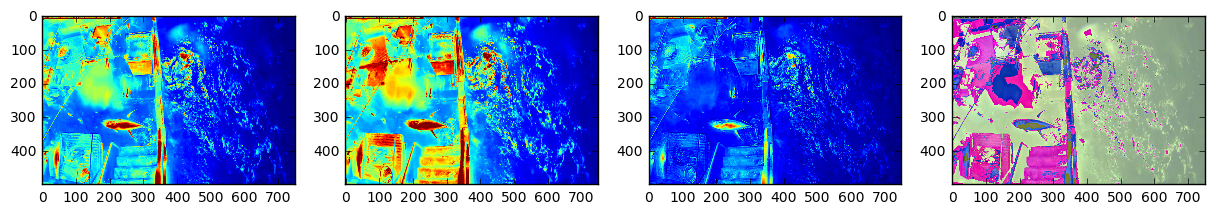

In [9]:
print("TEST batch generation at the end of an epoch")
X_batch_test = fd.make_batch(X_filenames, offset = len(X_filenames)-1, batch_size = 2, 
                                            std_y = std_y, std_x= std_x, normalize = True, mutate = True)
y_batch_test = fd.make_label(X_filenames, offset = len(X_filenames)-1, 
                                               batch_size = 2)
print("  Shape of batch array is correct: {}".format(X_batch_test.shape == (2, std_y, std_x, 3)))
print("  Average pixel value is less than 0.1: {}".format(np.mean(X_valid) <= 0.1))
print("  End of epoch navigated correctly: {}".format(all(y_batch_test[-1,:] == fd.make_label(X_filenames, 
                                                                                         offset = 0, 
                                                                                         batch_size = 1))  ))
print("")
for i, ix in enumerate([-1, 0]) :
    print(X_filenames[ix])
    print(y_batch_test[i])
    fd.show_panel(X_batch_test[i])

## Graph and Session Runs

#### Graph parameters

In [10]:
# General
num_channels = 3
num_labels = 8
batch_size = 25
stddev = 0.2

# convolution
kernel_sizes = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
stride = 1
conv_depths = [8, 8, 16, 16, 32, 32, 64, 64, 128, 128, 256, 256]
final_depth = conv_depths[-1]


#dropout
kp_hidden = 0.50

# fully connected
fc1_depth = 256
fc2_depth = 64

#regularization
beta = 1e-1 * (1/len(conv_depths))

# Learning rate
init_rate = 1e-2


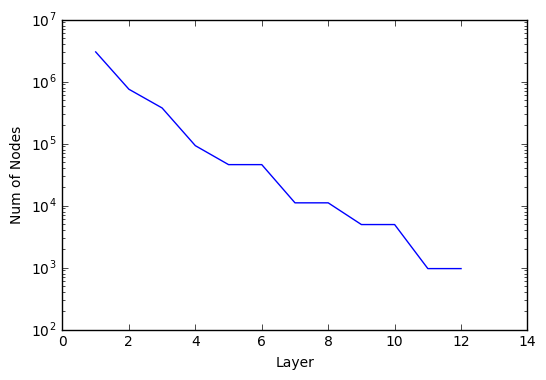

In [11]:
nodes = []
for i in [0,1,2,3,4,4,5,5,6,6,7,7] :
    nodes.append(fd.count_nodes(std_y, std_x, i, conv_depths[i]))

plt.figure()
plt.plot(range(1,13), nodes, '-')
plt.xlabel('Layer')
plt.ylabel('Num of Nodes')
plt.yscale('log')
plt.xlim(0, 14)
plt.show()
    

#### Session parameters

In [12]:
# epochs
num_epochs = 5
# path for tensorboard summary file to be written
logs_path = os.getcwd()+'/TB_logs'
valid_every = 25

In [16]:
%run -i 'GRAPH.py'

In [17]:
%run -i 'SESSION.py'

Initialized!


To view your tensorboard dashboard summary, run the following on the command line:
tensorboard --logdir='/Users/ccthomps/Documents/Python Files/Kaggle Competitions/Nature Conservancy Fisheries/TB_logs'

FINISHED TRAINING!
